In [2]:
# kommenteeri välja kui vaja
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/IDSProject2024_StudentPerformance/'

Mounted at /content/drive


In [3]:

import pandas as pd

try:
  df = pd.read_csv(file_path+"StudentPerformanceFactors.csv",sep=',')
  #df = pd.read_csv(file_path+"StudentPerformanceFactorsPuhas.csv",sep=';')
  print("DataFrame created successfully.")
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {file_path}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


DataFrame created successfully.


In [4]:
#trükime välja 50 esimest kirjet
print(df.tail(50))

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
6557             27          78               Medium              Medium   
6558             24          78                 High              Medium   
6559             28          72                  Low              Medium   
6560             18          83               Medium                High   
6561             28          66               Medium                 Low   
6562             19          91               Medium                 Low   
6563             29          73                  Low                 Low   
6564             20          84                 High              Medium   
6565             24          89               Medium                 Low   
6566             29          96                 High              Medium   
6567             19          93               Medium                High   
6568             21          84                 High                 Low   
6569        

In [12]:


# Find rows with empty cells
rows_with_empty_cells = df[df.isnull().any(axis=1)]
print("\nRows with empty cells:")
print(rows_with_empty_cells)

# Find columns with empty cells
cols_with_empty_cells = df.columns[df.isnull().any()]
print("\nColumns with empty cells:")
columns_to_check =  cols_with_empty_cells.tolist()
print(columns_to_check)



Rows with empty cells:
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
33               14          60                 High              Medium   
127              17          97               Medium              Medium   
240              15          87                  Low              Medium   
275              23          82                  Low              Medium   
316              24          90                  Low                 Low   
...             ...         ...                  ...                 ...   
6502             23          64               Medium              Medium   
6579              9          84               Medium              Medium   
6589             22          90                  Low                High   
6594              9          90                 High                High   
6596             17          92               Medium              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  

In [13]:

# Print unique values for specified columns
#['Gender', 'EthnicGroup', 'ParentEduc']  # Replace with your actual column names

for col in columns_to_check:
  try:
    unique_values = df[col].unique()
    print(f"\nUnique values for column '{col}':")
    print(unique_values)
  except KeyError:
    print(f"Error: Column '{col}' not found in the DataFrame.")


Unique values for column 'Teacher_Quality':
['Medium' 'High' 'Low' nan]

Unique values for column 'Parental_Education_Level':
['High School' 'College' 'Postgraduate' nan]

Unique values for column 'Distance_from_Home':
['Near' 'Moderate' 'Far' nan]


In [14]:

# Find the most frequent value for each specified column
#columns_to_check = ['Gender', 'EthnicGroup', 'ParentEduc']  # Replace with your actual column names

for col in columns_to_check:
    try:
        # Use value_counts() to get the frequency of each unique value
        value_counts = df[col].value_counts()

        # Get the most frequent value and its count
        most_frequent_value = value_counts.index[0]
        most_frequent_count = value_counts.iloc[0]

        print(f"\nMost frequent value for column '{col}': {most_frequent_value} (Count: {most_frequent_count})")

    except KeyError:
        print(f"Error: Column '{col}' not found in the DataFrame.")
    except IndexError:  # Handle cases where a column might be empty
      print(f"Error: Column '{col}' is empty or has no values.")


Most frequent value for column 'Teacher_Quality': Medium (Count: 3925)

Most frequent value for column 'Parental_Education_Level': High School (Count: 3223)

Most frequent value for column 'Distance_from_Home': Near (Count: 3884)


In [16]:


# Replace empty cells in specified columns with the most frequent value in each column
for col in columns_to_check:
    try:
        # Use value_counts() to get the frequency of each unique value
        value_counts = df[col].value_counts()

        # Get the most frequent value
        most_frequent_value = value_counts.index[0]

        # Fill NaN values with the most frequent value
        df[col].fillna(most_frequent_value, inplace=True)

        print(f"Empty cells in column '{col}' replaced with '{most_frequent_value}'")

    except KeyError:
        print(f"Error: Column '{col}' not found in the DataFrame.")
    except IndexError:  # Handle cases where a column might be empty
        print(f"Error: Column '{col}' is empty or has no values. Skipping...")

# Verify the changes (optional)
#print("\nDataFrame after replacing empty cells:")
#print(df.head(50))

rows_with_empty_cells_after = df[df.isnull().any(axis=1)]
print("\nRows with empty cells (after replacement):")
rows_with_empty_cells_after

Empty cells in column 'Teacher_Quality' replaced with 'Medium'
Empty cells in column 'Parental_Education_Level' replaced with 'High School'
Empty cells in column 'Distance_from_Home' replaced with 'Near'

DataFrame after replacing empty cells:

Rows with empty cells (after replacement):


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score



Rows with empty cells:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


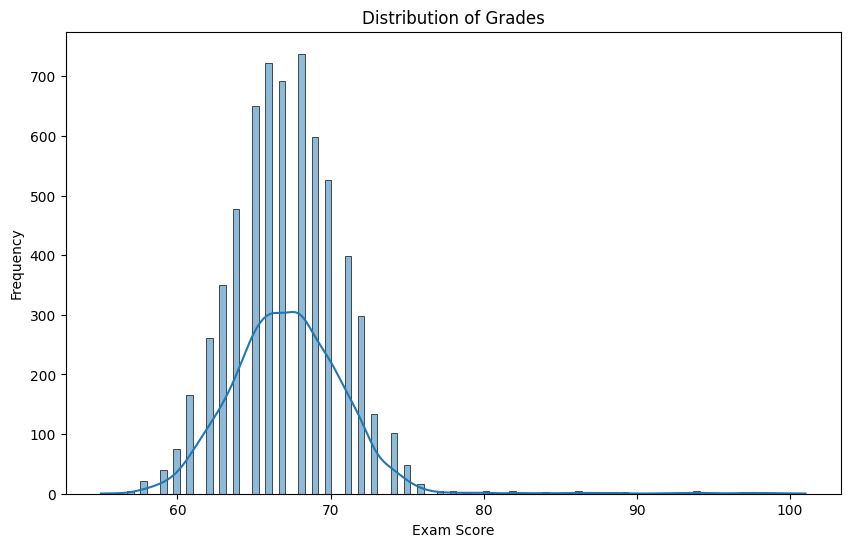

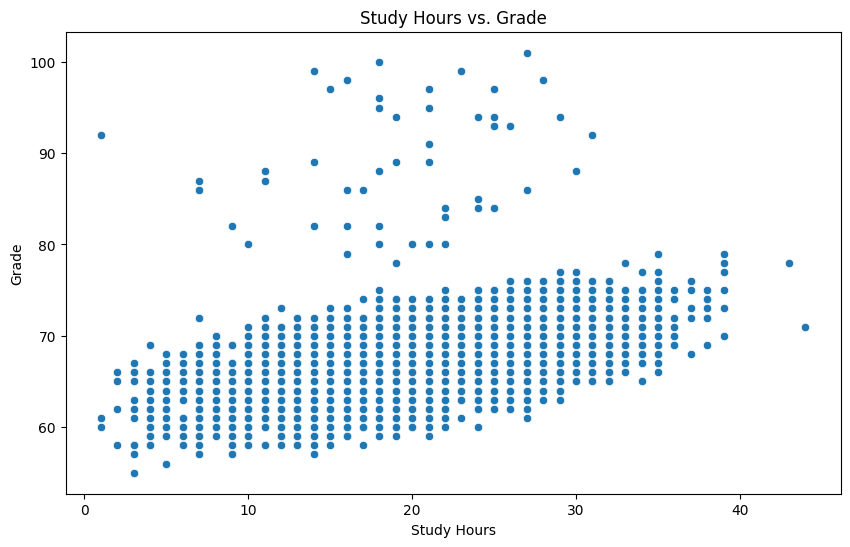

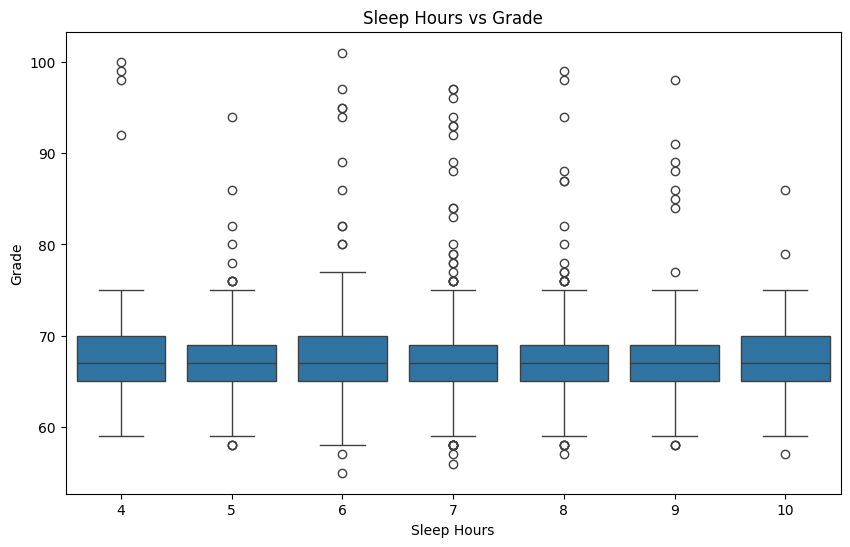

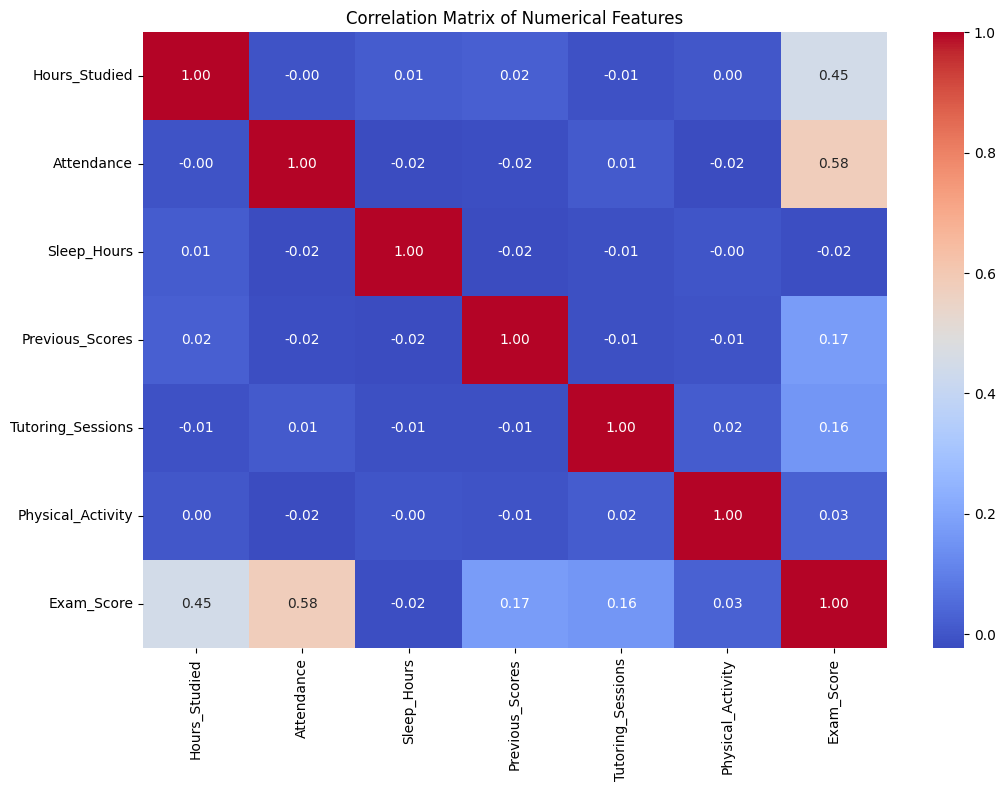

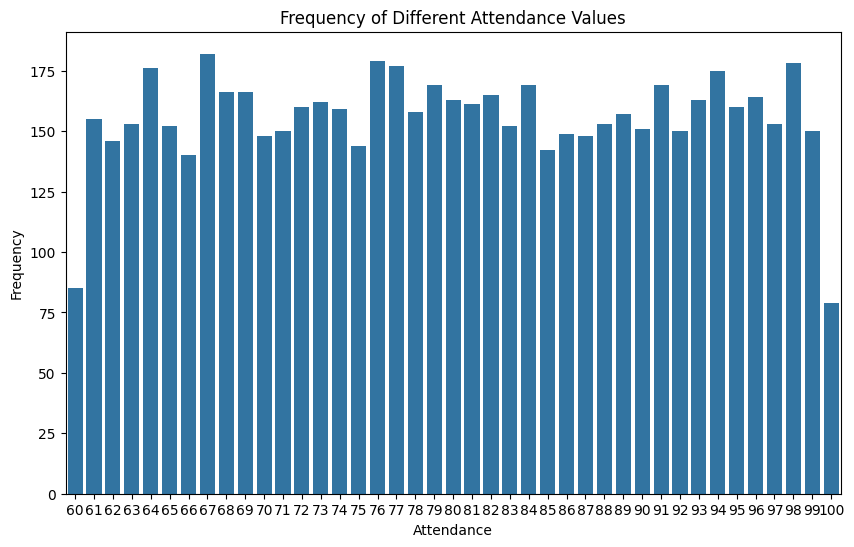

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the dataframe exists
if 'df' in locals():
    # 1. Distribution of Grades
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Exam_Score'], kde=True)
    plt.title('Distribution of Grades')
    plt.xlabel('Exam Score')
    plt.ylabel('Frequency')
    plt.show()

    # 2. Relationship between Study Hours and Grade
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
    plt.title('Study Hours vs. Grade')
    plt.xlabel('Study Hours')
    plt.ylabel('Grade')
    plt.show()

    # 3. Impact of SleepHours on Grade
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Sleep_Hours', y='Exam_Score', data=df)
    plt.title('Sleep Hours vs Grade')
    plt.xlabel('Sleep Hours')
    plt.ylabel('Grade')
    plt.show()


    # 4. Correlation Matrix Heatmap (for numerical features)
    numerical_cols = df.select_dtypes(include=['number']).columns
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

    # 5.  Example: Bar plot of the frequency of different attendance values.
    plt.figure(figsize=(10,6))
    sns.countplot(x='Attendance', data=df)
    plt.title('Frequency of Different Attendance Values')
    plt.xlabel('Attendance')
    plt.ylabel('Frequency')
    plt.show()

    # Add more visualizations as needed based on your data and analysis goals.
    # For example, you can create pairplots, violin plots, or explore relationships
    # between categorical variables and numerical variables.
else:
    print("DataFrame 'df' not found. Please run the code to create the dataframe first.")